In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np


In [35]:

#Loads data from prep output
main_df=pd.read_csv("C:\\Users\\Andrew\\Documents\\Covid-Panda\\Processed_data_sd_hb.csv")
hb_df = pd.read_csv("C:\\Users\\Andrew\\Documents\\Covid-Panda\\hb_group.csv")

In [37]:
#Selectons only the wanted columns
compare_dat = main_df[["CON_share","SNP_share","LAB_share","covidcases_norm"]]
hb_df = hb_df[["hb_name","Total_SNP","Total_CON","Total_LAB","Covid_Cases"]]

In [49]:
#Calculated the correlation of selected variables
hb_df.corr()

Total_SNP  Total_CON  Total_LAB  Covid_Cases
Total_SNP     1.000000   0.150532   0.186316     0.209602
Total_CON     0.150532   1.000000  -0.554392    -0.402929
Total_LAB     0.186316  -0.554392   1.000000     0.719661
Covid_Cases   0.209602  -0.402929   0.719661     1.000000

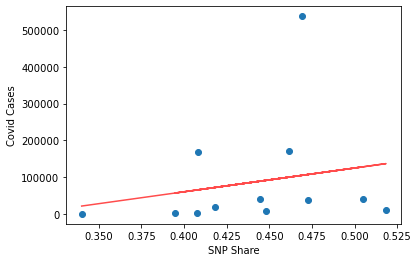

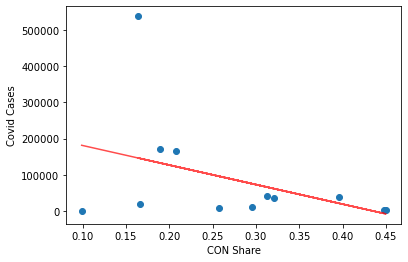

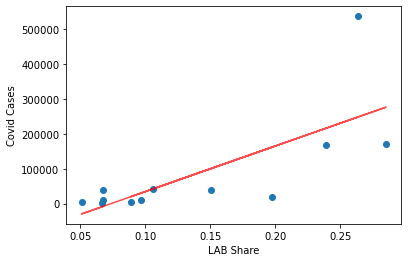

In [48]:
def linear_prep(party_var_name):
    xc = hb_df[party_var_name].values
    yc = hb_df["Covid_Cases"].values

    xc = xc.reshape(xc.shape[0],1)
    yc = yc.reshape(yc.shape[0],1)
    return [xc,yc]

def linear_build(data):
    linear_regressor = LinearRegression()
    linear_regressor.fit(data[0],data[1])
    return linear_regressor

def getnames_scatter(party_name):
    names = {"Total_SNP":"SNP Share","Total_CON":"CON Share","Total_LAB":"LAB Share"}
    return names[party_name]
    

def plot_party_cases(model,party_perc,r_data,party_var_name):
    plt.scatter(party_perc,hb_df["Covid_Cases"])
    #Get the name of the x col
    xlabel_scatter = getnames_scatter(party_var_name)
    #Set axis names
    plt.xlabel(xlabel_scatter)
    plt.ylabel("Covid Cases")

    #add regression model line
    plt.plot(party_perc,model.predict(r_data[0]),color ="red",alpha = 0.7 )
    return plt.show()





def party_cases(party_name):
    
    party_var_name = "Total_"+ party_name
    party_perc = hb_df[party_var_name]
    r_data = linear_prep(party_var_name)
    r_model = linear_build(r_data)
    plot_party_cases(r_model,party_perc,r_data,party_var_name)
party_cases("SNP")
party_cases("CON")
party_cases("LAB")


In [ ]:
x1= compare_dat["CON_share"].values
y1 =compare_dat["covidcases_norm"].values
#print ()
x=x1.reshape(x.shape[0],1)
y=y1.reshape(y.shape[0],1)

In [ ]:
linear_regressor = LinearRegression()
linear_regressor.fit(x,y)

In [ ]:
plt.scatter(compare_dat["CON_share"],compare_dat["covidcases_norm"])
plt.xlabel("CON Votes")
plt.ylabel("Covid Cases")
plt.plot(compare_dat["CON_share"],linear_regressor.predict(x),color="red")

In [ ]:
x1= compare_dat["SNP_share"].values
y1 =compare_dat["covidcases_norm"].values
#print ()
x=x1.reshape(x.shape[0],1)
y=y1.reshape(y.shape[0],1)

In [ ]:
linear_regressor2 = LinearRegression()
linear_regressor2.fit(x,y)

In [ ]:
plt.scatter(compare_dat["SNP_share"],compare_dat["covidcases_norm"])
plt.xlabel("SNP Votes")
plt.ylabel("Covid Cases")
plt.plot(compare_dat["SNP_share"],linear_regressor2.predict(x),"r--",color="red")